In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

def printMatrix(matrix):
    rows,col = matrix.shape
    print("printMatrix - Row: ", str(rows), "Column: ", str(col))
    lines = []
    for row in matrix:
        lines.append(' '.join(str(x) for x in row))
    print('\n'.join(lines))
    
## MATRIX X e Y com tamanhos diferentes!
generated_filepath = os.getcwd() + '\\Generated\\'
n_signs = 29
#row_count = 0

y_matrix = np.empty([0, n_signs])
x_matrix = []
for sign_count in range(0,n_signs):
        inputdir =  generated_filepath + str(sign_count) + '\\'
        y_sign = np.zeros((1,n_signs), dtype=np.int)
        y_sign[0][sign_count] = 1
        for image in os.listdir(inputdir):
            imageFilepath = inputdir + image
            img_matrix = cv2.imread(imageFilepath,0)
            img_array = np.ravel(img_matrix)
            y_matrix = np.concatenate((y_matrix, y_sign), axis=0)
            x_matrix.append(img_array)
            #row_count += 1
x_matrix = np.array(x_matrix)

min_max_scaler = preprocessing.MinMaxScaler()
x_matrix_scale = min_max_scaler.fit_transform(x_matrix)


print("X Shape: ", str(x_matrix.shape), type(x_matrix))
print("Y Shape: ", str(y_matrix.shape), type(y_matrix))



C:\Users\frede\Anaconda3\envs\idp\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


X Shape:  (14690, 3136) <class 'numpy.ndarray'>
Y Shape:  (14690, 29) <class 'numpy.ndarray'>


In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(x_matrix, y_matrix, test_size=0.33)
X_train, X_test, Y_train, Y_test = train_test_split(x_matrix_scale, y_matrix, test_size=0.33)


#clf = svm.SVC()
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf = MLPClassifier(activation='logistic', solver='lbfgs', hidden_layer_sizes=(3,1000))

clf.fit(X_train,Y_train)

accuracy = clf.score(X_test,Y_test)

print(100*accuracy)

#test_1 = clf.predict(X_test[30])
#print(test_1,Y_test[30])
#x_matrix



In [4]:

n_hidden_1 = 600
n_hidden_2 = 300

n_input = np.shape(x_matrix)[1]
y_output = np.shape(y_matrix)[1]
x = tf.placeholder(tf.float32,[None,n_input])
y = tf.placeholder(tf.float32,[None,y_output])

w1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b_out = tf.Variable(tf.random_normal([y_output]))
w_out = tf.Variable(tf.random_normal([n_hidden_2, y_output]))

layer_1 = tf.add(tf.matmul(x, w1), b1)
layer_1 = tf.nn.relu(layer_1)

layer_2 = tf.add(tf.matmul(layer_1, w2), b2)
layer_2 = tf.nn.relu(layer_2)

out_layer = tf.add(tf.matmul(layer_2,w_out),b_out)
pred = tf.nn.softmax(out_layer)






In [5]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer,labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

correct = tf.equal(tf.argmax(out_layer,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct,'float'))




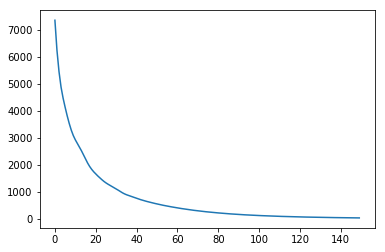

82.301980257


In [6]:
import matplotlib.pyplot as plt
epochs = 150

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    b = []
    ac = []
    X_train, X_test, Y_train, Y_test = train_test_split(x_matrix_scale, y_matrix, test_size=0.33)
    for i in range(epochs):
        _, a = sess.run([optimizer,cost],feed_dict={x:X_train,y:Y_train})
        c = sess.run(accuracy,feed_dict={x:X_test,y:Y_test})
        b.append(a)
        ac.append(c)
    
    plt.plot(b)
    plt.show()
    
    print(100*max(ac))